<a href="https://colab.research.google.com/github/NinaMoisienko18/KSVD/blob/main/Moisienko_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 8. Аналіз і візуалізація даних

[Посилання на GitHub]()


Для датасета https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt

In [ ]:
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


# Провести попередній аналіз даних:
Вивести інформацію про датасет, типи даних



In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Наявність дублікатів, пропущені значення,


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Перевести типи даних в числові (категоріальні ознаки)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [ ]:
occupation_map = {
    'Nurse': 0,
    'Doctor': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Teacher': 4,
    'Accountant': 5,
    'Salesperson': 6,
    'Scientist': 7,
    'Software Engineer': 8,
    'Sales Representative': 9,
    'Manager': 10
}

df['Occupation'] = df['Occupation'].map(occupation_map)

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,148
Obese,10


In [ ]:
category_map = {
    'Normal': 0,
    'Overweight':	1,
    'Obese': 2
    }

df['BMI Category'] = df['BMI Category'].map(category_map)

In [ ]:
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].map({'Sleep Apnea': 0, 'Insomnia': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 374 non-null    int64  
 1   Gender                    374 non-null    int64  
 2   Age                       374 non-null    int64  
 3   Occupation                374 non-null    int64  
 4   Sleep Duration            374 non-null    float64
 5   Quality of Sleep          374 non-null    int64  
 6   Physical Activity Level   374 non-null    int64  
 7   Stress Level              374 non-null    int64  
 8   BMI Category              374 non-null    int64  
 9   Heart Rate                374 non-null    int64  
 10  Daily Steps               374 non-null    int64  
 11  Sleep Disorder            155 non-null    float64
 12  Systolic Blood Pressure   374 non-null    int64  
 13  Diastolic Blood Pressure  374 non-null    int64  
dtypes: float64

Вивести оновлений датасет

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,8,6.1,6,42,6,1,77,4200,NaN,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,NaN,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,NaN,125,80
3,4,1,28,9,5.9,4,30,8,2,85,3000,0.0,140,90
4,5,1,28,9,5.9,4,30,8,2,85,3000,0.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95
370,371,0,59,0,8.0,9,75,3,1,68,7000,0.0,140,95
371,372,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95
372,373,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95


Ще раз перевірити наявність пропущених даних

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


Замінити пропущені значення на моду (або середні)

In [ ]:
most_common = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(most_common)

Вивести статистичні характеристики датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 374 non-null    int64  
 1   Gender                    374 non-null    int64  
 2   Age                       374 non-null    int64  
 3   Occupation                374 non-null    int64  
 4   Sleep Duration            374 non-null    float64
 5   Quality of Sleep          374 non-null    int64  
 6   Physical Activity Level   374 non-null    int64  
 7   Stress Level              374 non-null    int64  
 8   BMI Category              374 non-null    int64  
 9   Heart Rate                374 non-null    int64  
 10  Daily Steps               374 non-null    int64  
 11  Sleep Disorder            374 non-null    float64
 12  Systolic Blood Pressure   374 non-null    int64  
 13  Diastolic Blood Pressure  374 non-null    int64  
dtypes: float64

Вивести матрицю кореляції

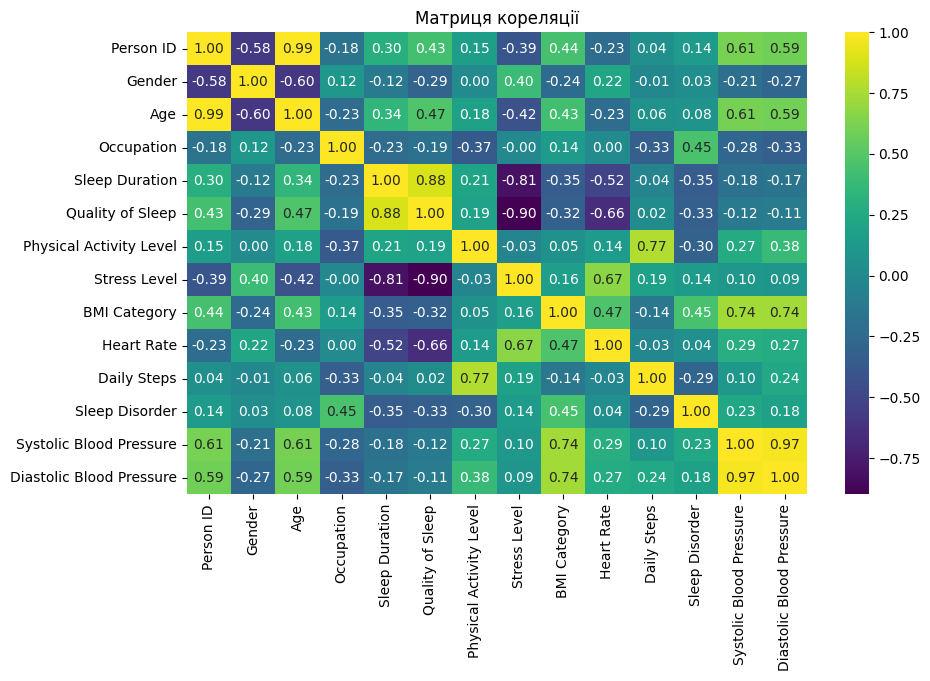

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Матриця кореляції')
plt.show()

# Приклади 3 графіків: matplotlib

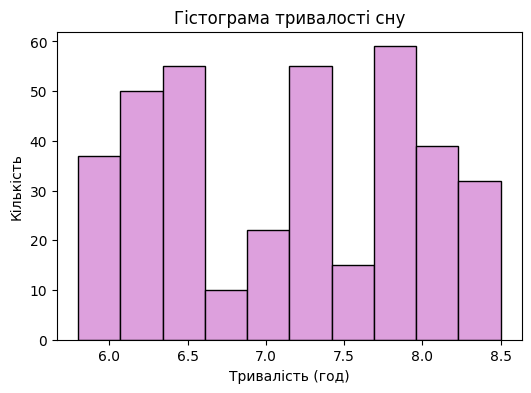

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['Sleep Duration'], color='plum', edgecolor='black')
plt.title('Гістограма тривалості сну')
plt.xlabel('Тривалість (год)')
plt.ylabel('Кількість')
plt.show()

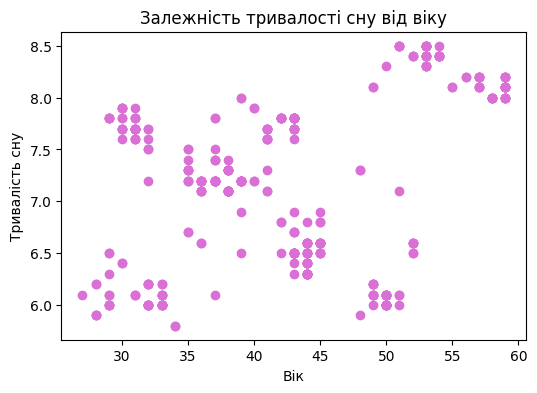

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Sleep Duration'], color='orchid')
plt.title('Залежність тривалості сну від віку')
plt.xlabel('Вік')
plt.ylabel('Тривалість сну')
plt.show()

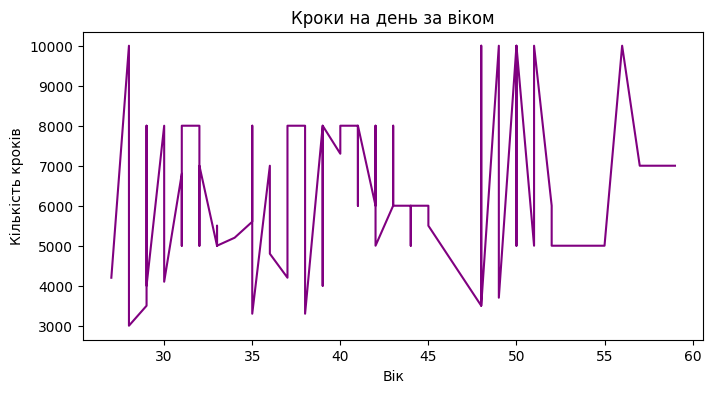

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df['Age'], df['Daily Steps'], color='purple')
plt.title('Кроки на день за віком')
plt.xlabel('Вік')
plt.ylabel('Кількість кроків')
plt.show()

# Приклади 3 графіків plotly

In [ ]:
fig = px.scatter(df, x="Sleep Duration", y="Stress Level", color="BMI Category",
                 title="Залежність тривалості сну від рівня стресу")
fig.show()

In [ ]:
fig2 = px.box(df, x='BMI Category', y='Sleep Duration', title='Залежність тривалості сну і BMI')

fig2.show()

In [ ]:
fig3 = px.scatter(df, x='Physical Activity Level', y='Stress Level',
                  size='Sleep Duration', title='Фізична активність vs Стрес')
fig3.show()

# Приклади 3 графіків seaborn


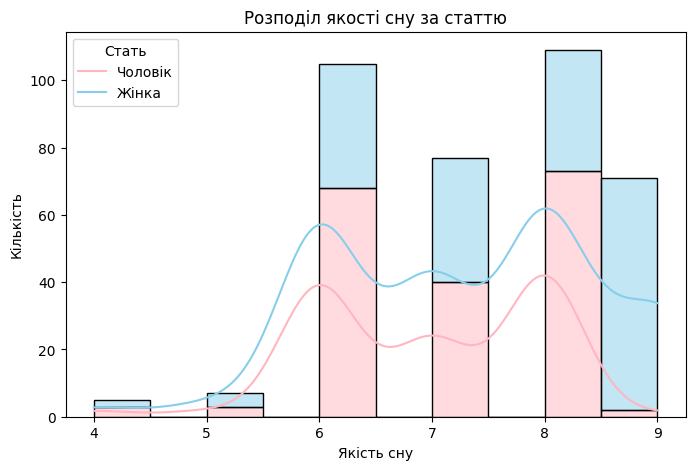

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Quality of Sleep', kde=True, hue='Gender', palette=['skyblue', 'lightpink'], multiple='stack')
plt.title('Розподіл якості сну за статтю')
plt.xlabel('Якість сну')
plt.ylabel('Кількість')
plt.legend(title='Стать', labels=['Чоловік', 'Жінка'])
plt.show()

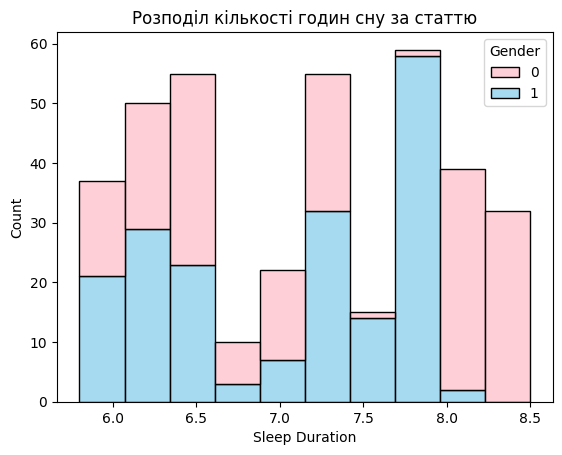

In [ ]:
sns.histplot(data=df, x='Sleep Duration', hue='Gender', multiple='stack', palette=['pink', 'skyblue'])
plt.title('Розподіл кількості годин сну за статтю')
plt.show()

<ipython-input-67-289b552da439>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




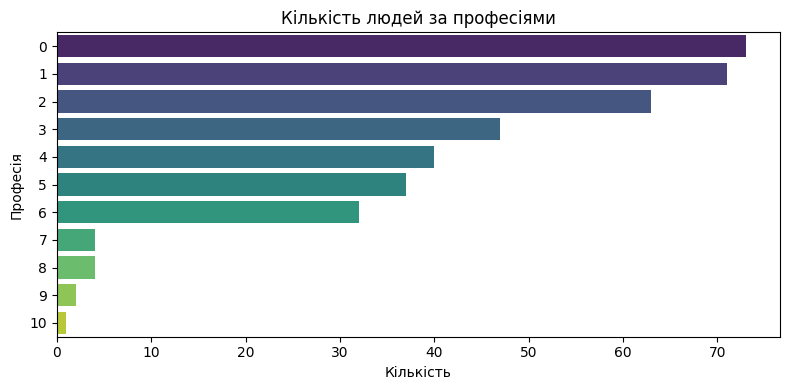

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='viridis')
plt.title('Кількість людей за професіями')
plt.xlabel('Кількість')
plt.ylabel('Професія')
plt.tight_layout()
plt.show()

#Приклад графіка altair

In [ ]:
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='Age',
    y='Sleep Duration',
    color='Gender:N',
    tooltip=['Person ID', 'Age', 'Sleep Duration']
).properties(title='Вік vs. Тривалість сну')
chart.show()

alt.Chart(...)

# Висновки:

В лабораторній роботі було проведено аналіз датасету Sleep Health and Lifestyle Dataset з використанням бібліотеки pandas. Для візуалізації даних були застосовані бібліотеки matplotlib, plotly, seaborn та altair
